# Money Heist Data Exploration
Having only watched one episode of Money Heist, I think this should be fun for me 😂


# Import dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/money-heist-season-1-to-5/money heist - all seasons.csv
/kaggle/input/money-heist-season-1-to-5/money heist - all seasons.xlsx


# Import dataset

Let's see what we're dealing with here...

In [2]:
input_file = '../input/money-heist-season-1-to-5/money heist - all seasons.csv'
data = pd.read_csv(input_file, encoding='latin-1')
data.head()

,Season,Episode,Name,On Air,Year,IMDB,Watch Time (minutes),Summary
0,1,1,Efectuar lo acordado,2-May-17,2017,8.4,47,The Professor recruits a young female robber a...
1,1,2,Imprudencias letales,9-May-17,2017,8.4,41,Hostage negotiator Raquel makes initial contac...
2,1,3,Misfire,16-May-17,2017,8.2,50,Police grab an image of the face of one of the...
3,1,4,Caballo de Troya,23-May-17,2017,8.3,51,Raquel is adversely affected by a personal cri...
4,1,5,El día de la marmota,30-May-17,2017,8.4,42,A sudden development in the investigation and ...


In [3]:
data.tail()

,Season,Episode,Name,On Air,Year,IMDB,Watch Time (minutes),Summary
31,5,1,The End of the Road,3-Sep-21,2021,7.5,49,The Professor faces off with Sierra as Tamayo ...
32,5,2,Do You Believe in Reincarnation?,3-Sep-21,2021,7.1,52,Arturo seizes an opportunity to fight back whi...
33,5,3,Welcome to the Spectacle of Life,3-Sep-21,2021,7.3,50,A betrayal and an emergency both catch Sierra ...
34,5,4,Your Place in Heaven,3-Sep-21,2021,7.8,52,"With Helsinki's life in danger, the thieves mo..."
35,5,5,Live Many Lives,3-Sep-21,2021,8.4,55,While surrounded by gunfire and trapped in the...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                36 non-null     int64  
 1   Episode               36 non-null     int64  
 2   Name                  36 non-null     object 
 3   On Air                36 non-null     object 
 4   Year                  36 non-null     int64  
 5   IMDB                  36 non-null     float64
 6   Watch Time (minutes)  36 non-null     int64  
 7   Summary               36 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.4+ KB


In [5]:
#some columns have whitespaces, we don't need those
data.columns = data.columns.str.strip()

In [6]:
data.describe()

,Season,Episode,Year,IMDB,Watch Time (minutes)
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2.833333,4.250000,2018.666667,8.188889,48.222222
std,1.404076,2.322253,1.549193,0.588838,5.361829
min,1.000000,1.000000,2017.000000,7.100000,41.000000
25%,1.750000,2.000000,2017.000000,7.775000,43.000000
50%,3.000000,4.000000,2019.000000,8.300000,47.500000
75%,4.000000,6.000000,2020.000000,8.425000,52.000000
max,5.000000,9.000000,2021.000000,9.500000,61.000000


# Average IMDB Rating of Each Season

<AxesSubplot:title={'center':'Average IMDB Rating of each Season'}, xlabel='IMDB Avg. Rating', ylabel='Season'>

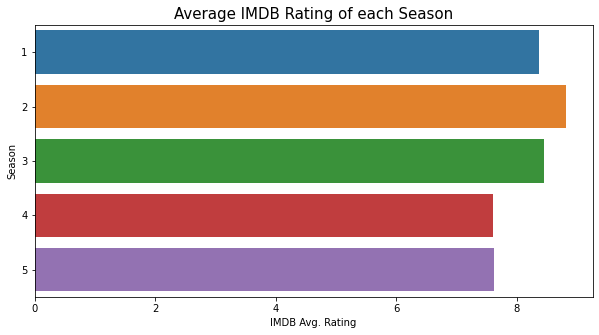

In [7]:
season_avg_rating = data.groupby('Season').mean().IMDB.to_frame().reset_index()
season_avg_rating.columns = ['Season', 'IMDB Avg. Rating']

plt.figure(figsize=(10,5))
plt.title('Average IMDB Rating of each Season', fontsize=15)
sns.barplot(y=season_avg_rating.Season, x=season_avg_rating['IMDB Avg. Rating'], orient='h')

**From this we learn that the second season had the highest IMDB Rating compared to other seasons of the show.**


Considering I started watching Lucifer from Season 5, I might reconsider watching Money Heist but from season two this time.😂

# Popular Episodes

**Exploring what episodes viewers liked the most based on IMBD ratings.**

<AxesSubplot:title={'center':'Average IMDB Rating of each Episode'}, xlabel='IMDB Avg. Rating', ylabel='Name'>

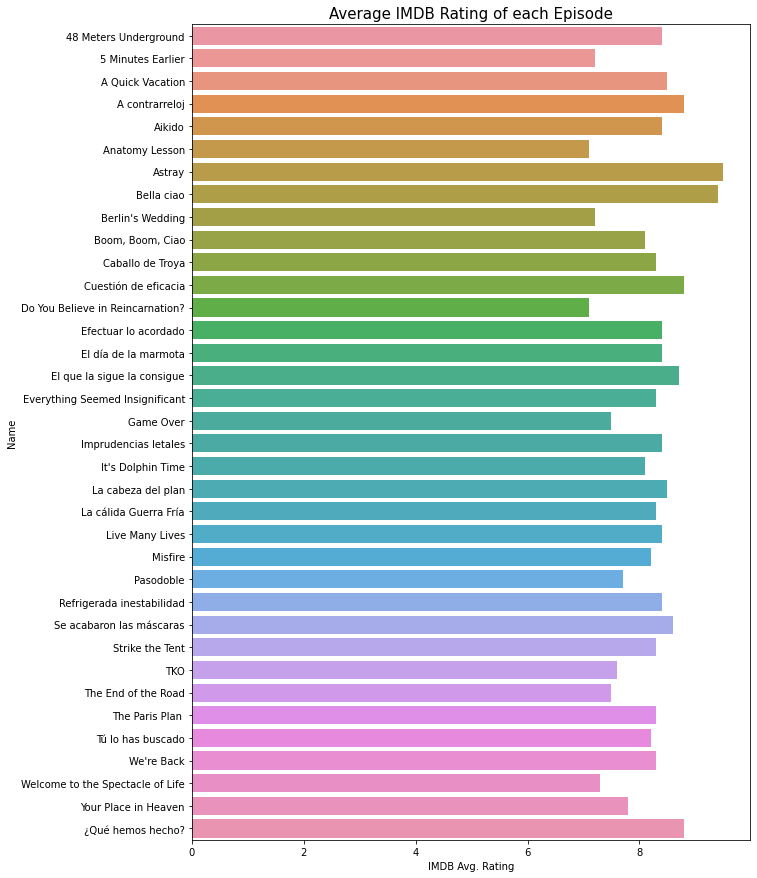

In [8]:
season_avg_rating = data.groupby('Name').mean().IMDB.to_frame().reset_index()
season_avg_rating.columns = ['Name', 'IMDB Avg. Rating']

plt.figure(figsize=(10,15))
plt.title('Average IMDB Rating of each Episode', fontsize=15)
sns.barplot(y=season_avg_rating.Name, x=season_avg_rating['IMDB Avg. Rating'], orient='h')

<AxesSubplot:title={'center':'Average IMDB Rating of each Episode'}, xlabel='IMDB Avg. Rating', ylabel='Name'>

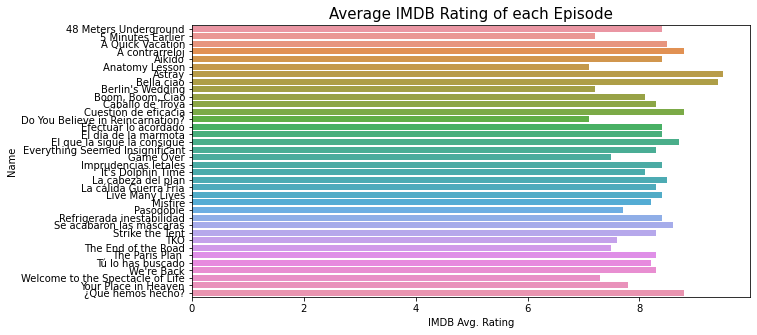

In [9]:
season_avg_rating = data.groupby('Name').mean().IMDB.to_frame().reset_index()
season_avg_rating.columns = ['Name', 'IMDB Avg. Rating']

plt.figure(figsize=(10,5))
plt.title('Average IMDB Rating of each Episode', fontsize=15)
sns.barplot(y=season_avg_rating.Name, x=season_avg_rating['IMDB Avg. Rating'], orient='h')

# Random fact I guess

In [10]:
print("The show started in {} and ended in {}, maybe. Who knows?".format(min(data['Year']),max(data['Year'])))

The show started in 2017 and ended in 2021, maybe. Who knows?


*Moving on...*

# Episodes in each season

<AxesSubplot:title={'center':'Count of episodes'}, xlabel='Season', ylabel='count'>

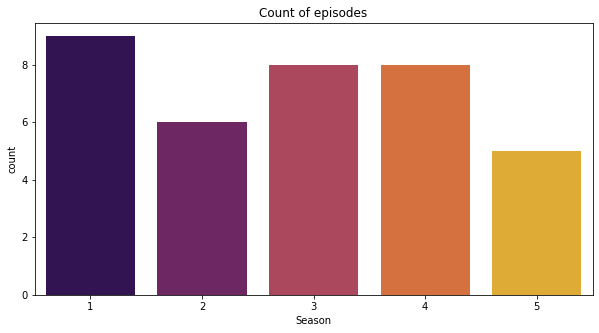

In [11]:
plt.figure(figsize=(10,5))
plt.xlabel("Season")
plt.title("Count of episodes")
sns.countplot(x = "Season", data = data,palette='inferno')

From this we can tell that Season 1 had the highest number of episodes.

In [12]:
#I felt like renaming a column
#This changes Watch Time in minutes to Duration
data.rename(
    columns=({ 'Watch Time (minutes)': 'Duration'}), 
    inplace=True,
)
data.head()

,Season,Episode,Name,On Air,Year,IMDB,Duration,Summary
0,1,1,Efectuar lo acordado,2-May-17,2017,8.4,47,The Professor recruits a young female robber a...
1,1,2,Imprudencias letales,9-May-17,2017,8.4,41,Hostage negotiator Raquel makes initial contac...
2,1,3,Misfire,16-May-17,2017,8.2,50,Police grab an image of the face of one of the...
3,1,4,Caballo de Troya,23-May-17,2017,8.3,51,Raquel is adversely affected by a personal cri...
4,1,5,El día de la marmota,30-May-17,2017,8.4,42,A sudden development in the investigation and ...


*Let's proceed 🧐*

# Duration of the Seasons

In [13]:
season_duration = data.groupby('Season').Duration.sum().to_frame().reset_index()
season_duration

,Season,Duration
0,1,406
1,2,279
2,3,391
3,4,402
4,5,258


**Let's put that in a graph?**

(0.0, 500.0)

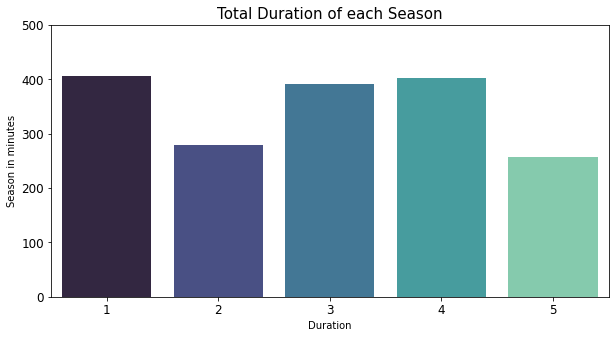

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='mako')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Season in minutes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 500)

*From this, I guess I could say I would be spending 400 minutes of my life watching the first season Money Heist 🤔*

*400 minutes is 6hrs and 40mins by the way but expressing that in minutes does sound like a lot of time though.*

# Episode by Rating

In [15]:
season_pop_epi = data[['Name', 'IMDB']].sort_values('IMDB', ascending=False).head(10).reset_index(drop=True)
season_pop_epi

,Name,IMDB
0,Astray,9.5
1,Bella ciao,9.4
2,A contrarreloj,8.8
3,Cuestión de eficacia,8.8
4,¿Qué hemos hecho?,8.8
5,El que la sigue la consigue,8.7
6,Se acabaron las máscaras,8.6
7,A Quick Vacation,8.5
8,La cabeza del plan,8.5
9,Efectuar lo acordado,8.4


**Let's have that in another graph**

(0.0, 10.0)

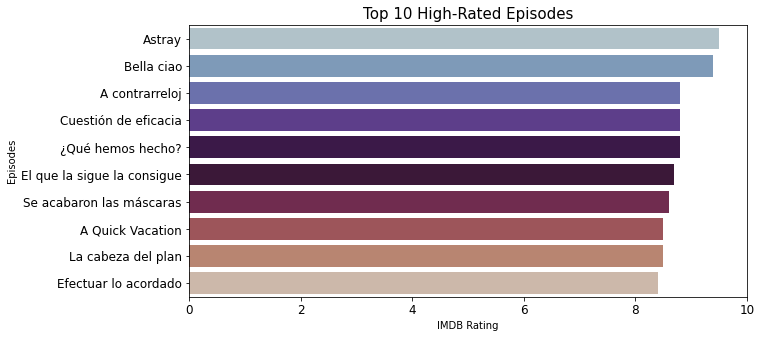

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi.Name, x=season_pop_epi.IMDB, palette='twilight', orient='h')
plt.title('Top 10 High-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Rating')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)

**From here, we can tell Astray is probably the best episode there is in the series**

# Let's try something else...

In [17]:
season_pop_epi_low = data[['Name', 'IMDB']].sort_values('IMDB', ascending=False).tail(10).reset_index(drop=True)
season_pop_epi_low

,Name,IMDB
0,Your Place in Heaven,7.8
1,Pasodoble,7.7
2,TKO,7.6
3,Game Over,7.5
4,The End of the Road,7.5
5,Welcome to the Spectacle of Life,7.3
6,Berlin's Wedding,7.2
7,5 Minutes Earlier,7.2
8,Do You Believe in Reincarnation?,7.1
9,Anatomy Lesson,7.1


**graph?**

(0.0, 10.0)

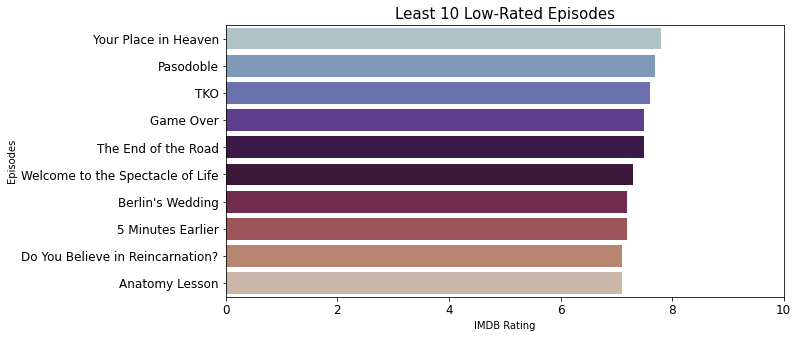

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(y=season_pop_epi_low.Name, x=season_pop_epi_low.IMDB, palette='twilight', orient='h')
plt.title('Least 10 Low-Rated Episodes', fontsize=15)
plt.xlabel('IMDB Rating')
plt.ylabel('Episodes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)

**I know it's a lot of bar charts, I guess I have my economics classes to blame for this but i'll try to do more with other options next time.**

# Wordcloud?

Wasn't sure if this was going to work because wordclouds have been a bit tricky for me but it worked on here so yay!

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

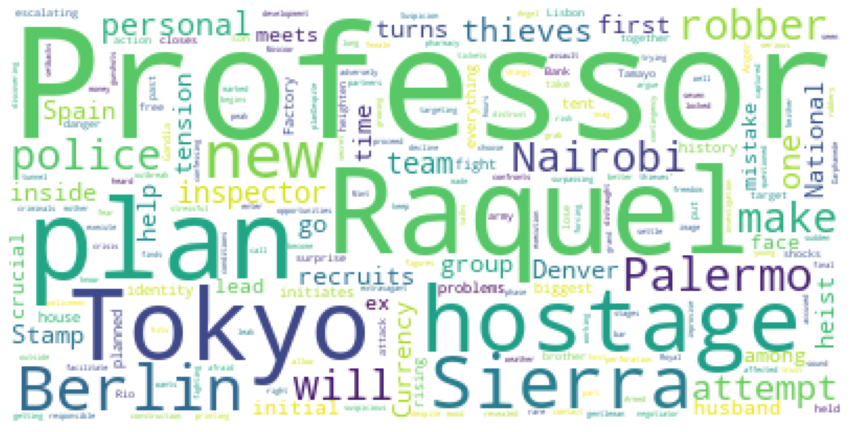

In [21]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=200, 
                          random_state=42
                         ).generate("".join(data['Summary']))

print(wordcloud)
fig = plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Okay, I'm done until I can think of something else.
# Bye! or something more appropriate... Ciao!